# BAN200 Week 08 Lecture

This notebook is incomplete. I will be adding code to it during our lecture. However, I will not be sharing the completed version. I want you to add the code yourself: this will help you learn. Before modifying this template, make sure to save a copy to your personal Google Drive. If you haven't saved your own copy, any changes you make will be lost when you close your browser window.

# IMDB Dataset

Today, we will be using the Large Movie Review Dataset: https://ai.stanford.edu/~amaas/data/sentiment/. This dataset contains 50,000 movie reviews from IMDB that are "highly polar" (i.e. either strongly negative or strongly positive).

The reviews are split into 25,000 training reviews and 25,000 test reviews.

Both the training reviews and test reviews are split 50/50 between positive reviews and negative reviews.

We want to build a model that will predict whether a review has positive or negative sentiment. But before we build our model, we will download the data and put it into a format we can work with.

In [ ]:
# download data

In [1]:
!wget 'https://storage.googleapis.com/wd13/imdb_data.zip'

--2024-03-07 22:12:02--  https://storage.googleapis.com/wd13/imdb_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64200274 (61M) [application/zip]
Saving to: ‘imdb_data.zip’

imdb_data.zip       100%[===================>]  61.23M  22.4MB/s    in 2.7s    

2024-03-07 22:12:05 (22.4 MB/s) - ‘imdb_data.zip’ saved [64200274/64200274]



In [ ]:
# unzip data

In [2]:
!unzip "imdb_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: imdb_data/train/pos/9260_7.txt  
  inflating: __MACOSX/imdb_data/train/pos/._9260_7.txt  
  inflating: imdb_data/train/pos/1599_7.txt  
  inflating: __MACOSX/imdb_data/train/pos/._1599_7.txt  
  inflating: imdb_data/train/pos/2174_8.txt  
  inflating: __MACOSX/imdb_data/train/pos/._2174_8.txt  
  inflating: imdb_data/train/pos/2309_9.txt  
  inflating: __MACOSX/imdb_data/train/pos/._2309_9.txt  
  inflating: imdb_data/train/pos/12034_10.txt  
  inflating: __MACOSX/imdb_data/train/pos/._12034_10.txt  
  inflating: imdb_data/train/pos/11703_9.txt  
  inflating: __MACOSX/imdb_data/train/pos/._11703_9.txt  
  inflating: imdb_data/train/pos/5619_9.txt  
  inflating: __MACOSX/imdb_data/train/pos/._5619_9.txt  
  inflating: imdb_data/train/pos/2928_10.txt  
  inflating: __MACOSX/imdb_data/train/pos/._2928_10.txt  
  inflating: imdb_data/train/pos/7096_10.txt  
  inflating: __MACOSX/imdb_data/train/pos/._7096_10.txt  
  inflating:

In [ ]:
# discuss how we want to use our data (mult-hot document-term-matrix; train,validation,test split; max tokens)
# import keras and tensorflow
# create keras datasets using text_dataset_from_directory
# create and adapt a vectorizer

In [4]:
import tensorflow as tf
import keras

In [7]:
train_dataset, validation_dataset = tf.keras.utils.text_dataset_from_directory(
    'imdb_data/train',
    validation_split = 0.2,
    subset = 'both',
    seed = 13
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [9]:
vectorizer = keras.layers.TextVectorization(
    output_mode = 'multi_hot',
    max_tokens = 10000
)

In [10]:
train_text = train_dataset.map(lambda x,y:x)
vectorizer.adapt(train_text)

In [12]:
input_layer = keras.Input(shape=(1,), dtype=tf.string)
vectorizer_layer = vectorizer(input_layer)

In [13]:
logistic_regression = keras.layers.Dense(1, activation = 'sigmoid')(vectorizer_layer)

In [15]:
model= keras.Model(inputs = input_layer, outputs= logistic_regression)

In [17]:
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [21]:
history= model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs= 20
)

Epoch 1/20
625/625 [==============================] - 6s 8ms/step - loss: 0.4654 - accuracy: 0.8328 - val_loss: 0.3627 - val_accuracy: 0.8750
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 0.3084 - accuracy: 0.8974 - val_loss: 0.3074 - val_accuracy: 0.8852
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 0.2560 - accuracy: 0.9160 - val_loss: 0.2854 - val_accuracy: 0.8888
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.2246 - accuracy: 0.9272 - val_loss: 0.2746 - val_accuracy: 0.8898
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 0.2020 - accuracy: 0.9362 - val_loss: 0.2693 - val_accuracy: 0.8916
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.1846 - accuracy: 0.9440 - val_loss: 0.2668 - val_accuracy: 0.8912
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 0.1705 - accuracy: 0.9499 - val_loss: 0.2663 - val_accuracy: 0.8914


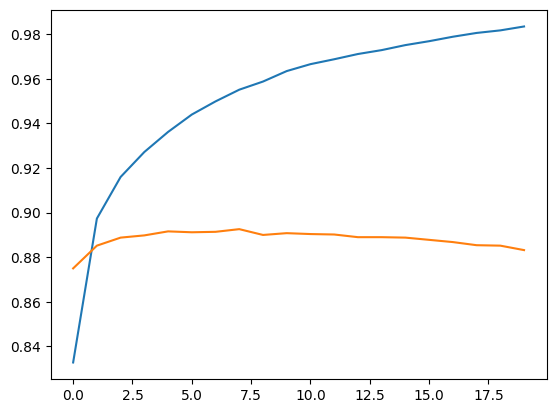

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [25]:
input_layer = keras.Input(shape=(1,), dtype=tf.string)
vectorizer_layer = vectorizer(input_layer)
logistic_regression = keras.layers.Dense(1, activation = 'sigmoid')(vectorizer_layer)
model= keras.Model(inputs = input_layer, outputs= logistic_regression)
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])
history= model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs= 20,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 3, restore_best_weights=True)]
)

Epoch 1/20
625/625 [==============================] - 8s 9ms/step - loss: 0.4632 - accuracy: 0.8356 - val_loss: 0.3619 - val_accuracy: 0.8758
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 0.3079 - accuracy: 0.8972 - val_loss: 0.3073 - val_accuracy: 0.8864
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 0.2556 - accuracy: 0.9165 - val_loss: 0.2852 - val_accuracy: 0.8878
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.2240 - accuracy: 0.9285 - val_loss: 0.2749 - val_accuracy: 0.8916
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.2018 - accuracy: 0.9363 - val_loss: 0.2690 - val_accuracy: 0.8920
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.1846 - accuracy: 0.9440 - val_loss: 0.2668 - val_accuracy: 0.8922
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.1705 - accuracy: 0.9498 - val_loss: 0.2659 - val_accuracy: 0.8916
Epoch 

# Logistic Regression

Now that we have our data setup, we will build a logistic regression.

In [ ]:
# discuss logistic regression and sigmoid activation function
# input layer
# vertorize layer
# logistic regression layer
# model
# compile model
# discuss number of parameters
# fit model
# plot loss
# plot accuracy
# discuss overtraining
# rebuild model with early stopping
# use test data to evaluate model

# Two-Layer Model

We will now build a model with a hidden layer between the vectorize layer and the logistic regression layer. The addition of hidden layers is what makes a model "deep", as in "deep learning".

In [ ]:
# discuss hidden layer and relu activation function
# input layer
# vectorize layer
# hidden layer
# logistic regression layer
# model
# compile model
# discuss number of parameters
# fit model
# plot loss
# discuss why overtraining problem has gotten worse
# rebuild model using early stopping
# use test data to evaluate model

In [26]:
input_layer = keras.Input(shape=(1,), dtype=tf.string)
vectorizer_layer = vectorizer(input_layer)
hidden_layer = keras.layers.Dense(16, activation = 'relu')(vectorizer_layer)
logistic_regression = keras.layers.Dense(1, activation = 'sigmoid')(hidden_layer)

In [28]:
model= keras.Model(inputs = input_layer, outputs= logistic_regression)
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])


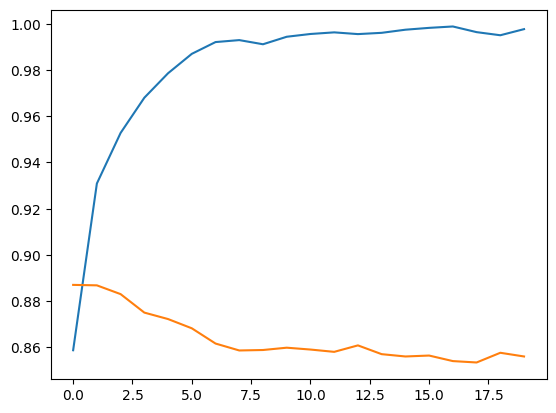

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
history= model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs= 20)

Epoch 1/20
625/625 [==============================] - 8s 12ms/step - loss: 0.3420 - accuracy: 0.8587 - val_loss: 0.2706 - val_accuracy: 0.8870
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 0.1879 - accuracy: 0.9309 - val_loss: 0.2934 - val_accuracy: 0.8868
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.1344 - accuracy: 0.9528 - val_loss: 0.3354 - val_accuracy: 0.8830
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0982 - accuracy: 0.9681 - val_loss: 0.3964 - val_accuracy: 0.8750
Epoch 5/20
625/625 [==============================] - 9s 14ms/step - loss: 0.0719 - accuracy: 0.9786 - val_loss: 0.4575 - val_accuracy: 0.8722
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0519 - accuracy: 0.9870 - val_loss: 0.5264 - val_accuracy: 0.8682
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0351 - accuracy: 0.9922 - val_loss: 0.6163 - val_accuracy: 0.8616
